In [1]:
import torch as trc, numpy as np, matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
!unzip -q drive/MyDrive/___Work/datasets.zip

# Data

In [3]:
data = pd.read_csv('dataset_1.csv')
data

,y,x_U_0_0,x_U_0_1,x_U_0_2,x_U_0_3,x_U_0_4,x_U_0_5,x_U_0_6,x_U_0_7,x_U_0_8,...,x_Stp_5_45,x_Stp_5_46,x_Stp_5_47,x_Stp_5_48,x_Stp_5_49,x_Stp_5_50,x_Stp_5_51,x_Stp_5_52,x_Stp_5_53,x_Stp_5_54
0,-4.233553,2.606032,2.552980,1.908913,1.078835,-0.146043,-0.730223,-0.670409,0.162306,0.513844,...,1.131698,1.103866,1.395858,1.640975,1.745467,1.811222,2.014510,2.169946,2.244816,2.438664
1,-1.011877,1.516057,1.455657,1.068938,0.519402,-0.163118,-0.690535,-0.682136,-0.066951,0.171233,...,0.977148,1.042969,1.068359,1.156836,1.266602,1.370703,1.465430,1.548438,1.627539,1.814453
2,-3.644534,4.170677,3.900828,2.993382,1.781614,0.417552,0.179588,0.766331,2.117894,2.442454,...,1.485596,1.545947,1.537549,1.604932,1.709814,1.793213,1.851221,1.896533,2.041260,2.243213
3,-1.033773,3.206544,3.120972,2.336085,1.350050,0.128297,-0.187719,0.075391,1.025074,1.239771,...,1.601318,1.646631,1.637842,1.714990,1.833936,1.940576,2.039209,2.114014,2.224365,2.447021
4,-1.064305,2.847665,2.718490,2.023129,1.179891,0.174447,-0.120963,0.098275,1.061971,1.176278,...,1.056250,1.041016,0.983594,1.012891,1.067773,1.116406,1.159961,1.203320,1.246680,1.404492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-3.258447,1.336375,1.068919,0.501122,0.131322,-0.090578,-0.173463,-0.119020,0.265843,0.336815,...,14.800195,15.015625,14.693555,14.042773,13.070508,12.446484,11.914258,11.718164,11.598633,11.828320
2934,-6.631887,0.369445,0.494371,0.333947,0.157921,-0.098280,-0.373549,-0.480970,-0.313197,-0.122767,...,13.731795,14.009302,13.868351,12.936711,11.427922,11.024764,10.806828,10.859074,10.979354,11.255721
2935,-2.681126,2.597960,2.437877,1.714293,1.048180,0.441076,0.568273,0.794518,1.255993,1.264952,...,12.326172,12.103711,11.597266,11.329688,10.852539,10.133008,9.691992,9.519141,9.630859,9.863477
2936,-2.918484,1.124765,1.129623,0.889120,0.637313,0.286190,-0.176969,-0.305704,-0.088028,0.140121,...,10.565576,10.047607,9.753662,9.581592,8.840381,7.913232,7.574170,7.499561,7.673975,8.017725


In [4]:
data.iloc[:, ::330].describe()

,y,x_Ice_0_54,x_Prs_1_54,x_Tr_2_54,x_Ta_3_54,x_V_4_54,x_U_5_54,x_Stp_5_54
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,5.929174,0.000711,1014.466480,2.881120,6.807391,-1.296121,1.650556,8.648627
std,10.261930,0.012264,6.168957,10.505956,8.960587,2.394965,3.258421,6.723962
min,-22.924827,0.000000,996.338234,-18.938775,-16.587771,-8.652511,-9.804416,-0.648926
25%,-2.533208,0.000000,1009.924727,-6.631146,-0.656210,-2.874847,-0.286875,2.249398
50%,5.501247,0.000000,1014.441070,3.101598,6.556785,-0.818961,2.133366,6.851782
75%,15.320820,0.000000,1019.203557,12.303907,14.983198,0.545206,4.099189,14.996863
max,24.307005,0.338037,1032.269562,22.516161,23.508466,4.993800,9.278782,23.143994


In [5]:
dt_train, dt_test = train_test_split(data, test_size=0.17, shuffle=False,
                                     random_state=0)
len(dt_train), len(dt_test)

(2438, 500)

In [8]:
class WeatherDataset(trc.utils.data.Dataset):
  def __init__(self, data):
    self.X = trc.tensor(data.iloc[:, 1:].values, dtype=trc.float)
    self.y = trc.tensor(data.y.values, dtype=trc.float)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [9]:
ds_train, ds_test = WeatherDataset(dt_train), WeatherDataset(dt_test)
len(ds_train), len(ds_test)

(2438, 500)

In [10]:
len(ds_train[0][0]), ds_train[0][1]

(2310, tensor(-4.2336))

In [11]:
batch_size = 100

train_dl = trc.utils.data.DataLoader(ds_train, batch_size, shuffle=True,
                                     pin_memory=True, num_workers=2, drop_last=True)
test_dl = trc.utils.data.DataLoader(ds_test, len(ds_test),
                                    pin_memory=True, num_workers=2)

# Net

In [12]:
class WeatherNet(trc.nn.Module):
  def __init__(self):
    super().__init__()

    self.fc_1 = trc.nn.Linear(2310, 10000)
    self.fc_2 = trc.nn.Linear(10000, 5000)
    self.fc_3 = trc.nn.Linear(5000, 2500)
    self.fc_4 = trc.nn.Linear(2500, 1024)
    self.fc_5 = trc.nn.Linear(1024, 512)
    self.fc_6 = trc.nn.Linear(512, 256)
    self.fc_7 = trc.nn.Linear(256, 1)

    self.act = trc.nn.ReLU()

  def forward(self, x):
    # print(x.shape)
    x = self.act(self.fc_1(x))
    x = self.act(self.fc_2(x))
    x = self.act(self.fc_3(x))
    x = self.act(self.fc_4(x))
    x = self.act(self.fc_5(x))
    x = self.act(self.fc_6(x))
    return self.fc_7(x).squeeze()

In [13]:
np.random.seed(1)
trc.manual_seed(1)
trc.cuda.manual_seed(1)
trc.backends.cudnn.determenistic = True

In [14]:
device = ('cuda:0' if trc.cuda.is_available() else 'cpu')

net = WeatherNet().to(device)
loss = trc.nn.MSELoss()
optimizer = trc.optim.Adam(net.parameters(), lr=0.001, amsgrad=True)
# optimizer = trc.optim.NAdam(net.parameters(), lr=0.001)
# scheduler = trc.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

device

'cuda:0'

# Learning

In [15]:
train_loss_hist, train_r2_hist = [], []
test_loss_hist, test_r2_hist = [], []
min_loss = 1000
# lr_red, k = [0.8, 0.9], 0

for epoch in tqdm(range(20)):
  net.train()
  batch_n, loss_sum, r2_sum = 0, 0, 0

  for input, targets in train_dl:
    input = input.to(device)
    targets = targets.to(device)

    preds = net.forward(input)
    # print(preds.shape, targets.shape)
    loss_val = loss(preds, targets)
    loss_val.backward()

    loss_sum += loss_val.data.cpu()
    r2_sum += r2_score(targets.cpu(), preds.data.cpu())
    batch_n += 1

    optimizer.step()
    optimizer.zero_grad()

  train_loss_hist.append(loss_sum/batch_n)
  train_r2_hist.append(r2_sum/batch_n)
  net.eval()

  for input, targets in test_dl:
    input = input.to(device)
    targets = targets.to(device)

    with trc.set_grad_enabled(False):
      preds = net.forward(input)
      loss_val = loss(preds, targets).data.cpu()

    test_loss_hist.append(loss_val)
    test_r2_hist.append(r2_score(targets.cpu(), preds.data.cpu()))

    if loss_val <= min_loss:
      trc.save(net, 'weather_model')
      min_loss = loss_val

    '''if k < len(lr_red) and accuracy > lr_red[k]:
      scheduler.step()
      k+=1'''

100%|██████████| 20/20 [01:03<00:00,  3.18s/it]


# Statistics

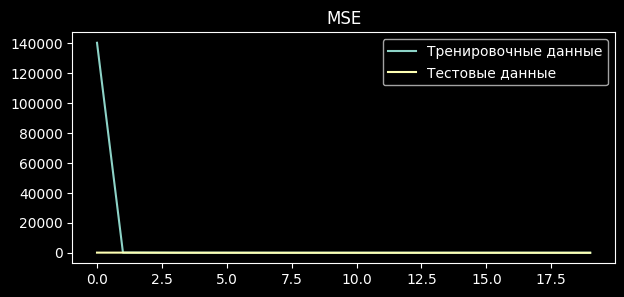

In [16]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (7, 3)

plt.plot(train_loss_hist, label='Тренировочные данные')
plt.plot(test_loss_hist, label='Тестовые данные')
plt.title('MSE')
plt.legend();

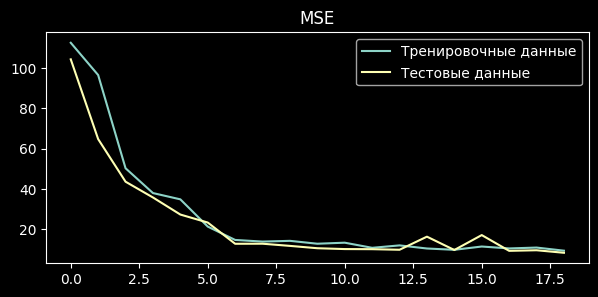

In [17]:
plt.plot(train_loss_hist[1:], label='Тренировочные данные')
plt.plot(test_loss_hist[1:], label='Тестовые данные')
plt.title('MSE')
plt.legend();

In [18]:
print(min_loss**(1/2))

tensor(2.8912)


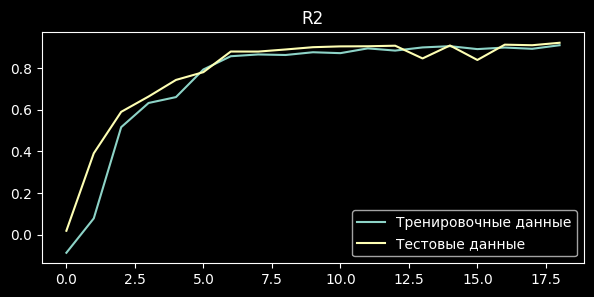

In [19]:
plt.plot(train_r2_hist[1:], label='Тренировочные данные')
plt.plot(test_r2_hist[1:], label='Тестовые данные')
plt.title('R2')
plt.legend();

# Testing

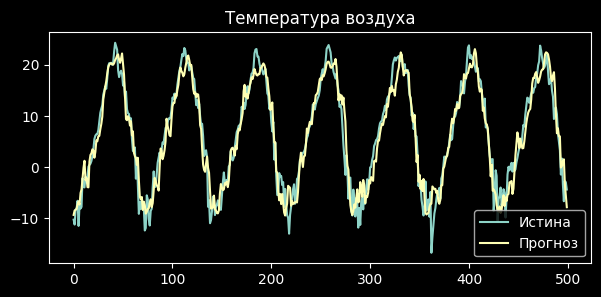

In [20]:
net_test = trc.load('weather_model')
net_test.to('cpu')
preds, targets = trc.tensor([]), trc.tensor([])

for X, y in test_dl:
  with trc.set_grad_enabled(False):
    res = net_test.forward(X).data

  preds = trc.cat([preds, res])
  targets = trc.cat([targets, y])

plt.plot(targets, label='Истина')
plt.plot(preds, label='Прогноз')
plt.title('Температура воздуха')
plt.legend();

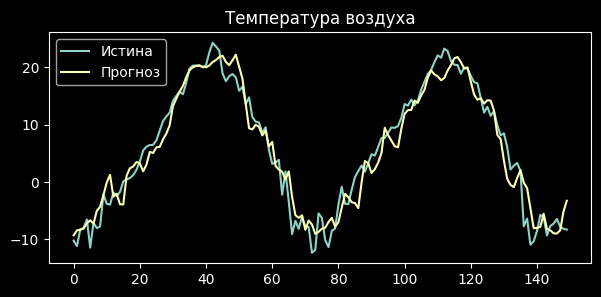

In [21]:
plt.plot(targets[:150], label='Истина')
plt.plot(preds[:150], label='Прогноз')
plt.title('Температура воздуха')
plt.legend();